In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
# location of dataset:- 'C:\\Users\\ADMIN\\Downloads'

movies=pd.read_csv('Movie+Assignment+Data.csv')


In [4]:
movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# Check the number of rows and columns in the dataframe

movies.shape


(100, 62)

In [6]:
# Check the column-wise info of the dataframe
movies.info


<bound method DataFrame.info of                                            Title  title_year     budget  \
0                                     La La Land        2016   30000000   
1                                       Zootopia        2016  150000000   
2                                           Lion        2016   12000000   
3                                        Arrival        2016   47000000   
4                          Manchester by the Sea        2016    9000000   
..                                           ...         ...        ...   
95                                      Whiplash        2014    3300000   
96                               Before Midnight        2013    3000000   
97    Star Wars: Episode VII - The Force Awakens        2015  245000000   
98  Harry Potter and the Deathly Hallows: Part I        2010  150000000   
99                       Tucker and Dale vs Evil        2010    5000000   

        Gross              actor_1_name        actor_2_name  \
0   

In [7]:
movies.isnull().sum()

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

In [8]:
# so as we can see in the data frame info no null values are present, hence we crosschecked and confirmed it.

In [9]:
# Check the summary for the numeric columns 
movies.describe()


,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [10]:
movies[['budget','Gross']].head()

,budget,Gross
0,30000000,151101803
1,150000000,341268248
2,12000000,51738905
3,47000000,100546139
4,9000000,47695371


In [11]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies.budget=movies.budget.floordiv(1000000)



In [12]:
movies.Gross=movies.Gross.floordiv(1000000)

In [13]:
movies[['budget','Gross']].head()

,budget,Gross
0,30,151
1,150,341
2,12,51
3,47,100
4,9,47


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [14]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies['profit']=movies.Gross-movies.budget

In [15]:
movies.profit.head()

0    121
1    191
2     39
3     53
4     38
Name: profit, dtype: int64

In [16]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

movies=movies.sort_values('profit',ascending=False)

movies.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214


In [17]:
movies.reset_index(inplace=True)

In [18]:
movies.head(3)

,index,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
1,11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
2,47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305


In [19]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top10=movies.iloc[0:10,:]
top10

,index,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
0,97,Star Wars: Episode VII - The Force Awakens,2015,245,936,Doug Walker,Rob Walker,0,131,12.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691
1,11,The Avengers,2012,220,623,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403
2,47,Deadpool,2016,58,363,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305
3,32,The Hunger Games: Catching Fire,2013,130,424,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294
4,12,Toy Story 3,2010,200,414,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214
5,8,The Dark Knight Rises,2012,250,448,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198
6,45,The Lego Movie,2014,60,257,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197
7,1,Zootopia,2016,150,341,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191
8,41,Despicable Me,2010,69,251,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182
9,18,Inside Out,2015,175,356,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181


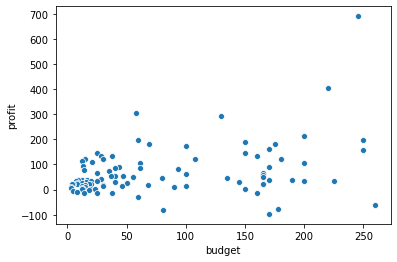

In [20]:
#Plot profit vs budget
sns.scatterplot(movies.budget,movies.profit)
plt.show()


so plotting the scatter plot for the profit vs budget and observing we can see that there is a good chunk between  0 and 250 m$ profit and as the budget increases so does the profit comparatively, also we can see there are movies with negative profit even if the budget is high, now this is not normal as for some good movies which we know it did well but it shows negative profit. So we need to look into it.

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [21]:
#Find the movies with negative profit
neg_profit=movies[movies['profit']<0]
neg_profit.head()

,index,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
89,99,Tucker and Dale vs Evil,2010,5,0,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779.0,...,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-5
90,89,Amour,2012,8,0,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,...,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8
91,56,Rush,2013,38,26,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-12
92,66,Warrior,2011,25,13,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-12
93,82,Flipped,2010,14,1,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,...,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-13


In [22]:
neg_profit.shape

(11, 64)

In [23]:
## so we after extracting movies with neg.profit, we can see there are a total of 11 movies who got loss. 

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [24]:
movies[['Title','MetaCritic']].head(3)

,Title,MetaCritic
0,Star Wars: Episode VII - The Force Awakens,81.0
1,The Avengers,69.0
2,Deadpool,65.0


In [25]:
movies['IMDb_rating'].head(3)

0    8.1
1    8.1
2    8.0
Name: IMDb_rating, dtype: float64

In [26]:
# Change the scale of MetaCritic
movies.MetaCritic=movies.MetaCritic.div(10)
movies.MetaCritic.head(3)


0    8.1
1    6.9
2    6.5
Name: MetaCritic, dtype: float64

In [27]:
# Find the average ratings
movies['Avg_rating']=(movies["MetaCritic"]+ movies["IMDb_rating"])/2
movies.Avg_rating.head(3)

0    8.10
1    7.50
2    7.25
Name: Avg_rating, dtype: float64

In [28]:
df=movies.filter(['Title','IMDb_rating','MetaCritic','Avg_rating'], axis=1)

In [29]:
df=df[abs(df['IMDb_rating']-df['MetaCritic'] < 0.5)]
df.head(3)

,Title,IMDb_rating,MetaCritic,Avg_rating
0,Star Wars: Episode VII - The Force Awakens,8.1,8.1,8.10
3,The Hunger Games: Catching Fire,7.6,7.6,7.60
4,Toy Story 3,8.3,9.2,8.75


In [30]:
#Sort in descending order of average rating
df=df.sort_values('Avg_rating',ascending=False)
df.head()


,Title,IMDb_rating,MetaCritic,Avg_rating
69,Boyhood,7.9,10.0,8.95
51,12 Years a Slave,8.1,9.6,8.85
9,Inside Out,8.2,9.4,8.80
20,La La Land,8.2,9.3,8.75
4,Toy Story 3,8.3,9.2,8.75


In [31]:
df.reset_index(inplace=True)

In [32]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8
UniversalAcclaim=df[(df['Avg_rating'] >=8)]
UniversalAcclaim


,index,Title,IMDb_rating,MetaCritic,Avg_rating
0,69,Boyhood,7.9,10.0,8.95
1,51,12 Years a Slave,8.1,9.6,8.85
2,9,Inside Out,8.2,9.4,8.80
3,20,La La Land,8.2,9.3,8.75
4,4,Toy Story 3,8.3,9.2,8.75
5,49,Manchester by the Sea,7.9,9.6,8.75
6,64,Spotlight,8.1,9.3,8.70
7,10,Gravity,7.8,9.6,8.70
8,90,Amour,7.9,9.4,8.65
9,81,Before Midnight,7.9,9.4,8.65


**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [33]:
# Write your code here
popular_trios=movies.groupby(['actor_1_name','actor_2_name','actor_3_name'])[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].sum()


In [34]:
popular_trios['total_likes']=popular_trios.actor_1_facebook_likes + popular_trios.actor_2_facebook_likes + popular_trios.actor_3_facebook_likes

In [35]:
popular_trios.sort_values('total_likes',ascending=False,inplace=True)

In [36]:
popular_trios.total_likes.head()

actor_1_name       actor_2_name        actor_3_name        
Dev Patel          Nicole Kidman       Rooney Mara             138800.0
Leonardo DiCaprio  Tom Hardy           Joseph Gordon-Levitt     79000.0
Jennifer Lawrence  Peter Dinklage      Hugh Jackman             76000.0
Casey Affleck      Michelle Williams   Kyle Chandler            74818.0
Tom Hardy          Christian Bale      Joseph Gordon-Levitt     73000.0
Name: total_likes, dtype: float64

In [37]:
popular_trios.reset_index(inplace=True)

In [38]:
popular_trios.iloc[:5,:]

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,total_likes
0,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,138800.0
1,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
2,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
3,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,74818.0
4,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,73000.0


In [39]:
ptrios_list = [popular_trios.iloc[:5,:3].values.tolist()]

In [40]:
ptrios_list

[[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
  ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
  ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
  ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
  ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**
  3 trios satisfy

- **`Most popular trio after applying the condition:`**
 trio no.2(Leonardo DiCaprio, Tom Hardy, Joseph Gordon-Levitt) is the most popular.

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [41]:
# Your answer here (optional)



- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

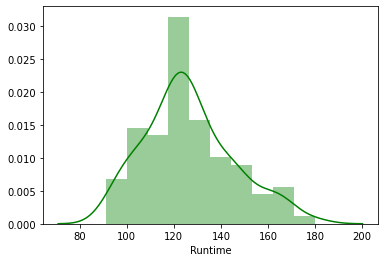

In [42]:
# Runtime histogram/density plot
sns.distplot(movies.Runtime,color='g')
plt.show()


In [43]:
## As we plot the distplot we notice that the peak, that shows most movies are in the range of 120 - 125 mins i.e. they are mostly of 2-2.5hrs.


**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [44]:
# Write your code here
PopularR=movies[movies['content_rating']=='R']

In [45]:
PopularR.sort_values('CVotesU18',ascending=False,inplace=True)

In [46]:
PopularR=PopularR.filter(['Title','CVotesU18'],axis=1)

In [47]:
PopularR.reset_index(inplace=True)

In [48]:
PopularR.iloc[:10,:]

,index,Title,CVotesU18
0,2,Deadpool,4598
1,75,The Wolf of Wall Street,3622
2,36,Django Unchained,3250
3,84,Mad Max: Fury Road,3159
4,80,Whiplash,2878
5,43,The Revenant,2619
6,44,Shutter Island,2321
7,24,Gone Girl,2286
8,52,The Grand Budapest Hotel,2083
9,65,Birdman or (The Unexpected Virtue of Ignorance),1891


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [49]:
# Create the dataframe df_by_genre

df_by_genre=movies.loc[:,'genre_1':'VotesnUS']

In [50]:
df_by_genre=df_by_genre.drop(['MetaCritic','Runtime'],axis=1)

In [51]:
df_by_genre.head(3)

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
0,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9
1,Action,Sci-Fi,NaN,260257,234203,264290,162604,67579,27957,12176,...,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9
2,Action,Adventure,Comedy,147467,147966,170810,105717,41811,15510,7046,...,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9


In [52]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt']=1


In [53]:
df_by_genre.cnt.head(2)

0    1
1    1
Name: cnt, dtype: int64

In [54]:
# Group the movies by individual genres

df_by_g1=df_by_genre.groupby('genre_1').sum()
df_by_g1.head(3)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_1,,,,,,,,,,,,,,,,,,,,,
Action,2928407,3261919,4247693,2662020,986774,364234,156150,89483,61975,162426,...,209.1,208.8,210.0,206.5,206.0,209.0,197.2,215.8,209.5,27
Adventure,1058779,1179818,1560541,966275,365486,136985,58559,33174,22018,48100,...,92.7,92.6,93.5,92.0,91.6,93.8,88.9,95.3,93.5,12
Animation,681562,798227,1153214,722782,251076,83069,30718,15733,10026,25193,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11


In [55]:
df_by_g2=df_by_genre.groupby('genre_2').sum()
df_by_g2.head(3)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_2,,,,,,,,,,,,,,,,,,,,,
Action,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Adventure,2297820,2548864,3271725,2055600,758009,272735,113691,64623,44121,116937,...,171.0,170.4,173.9,169.2,168.4,172.8,162.7,176.4,171.6,22
Biography,185172,313178,576374,370003,119348,38643,14844,7974,5248,13828,...,38.3,38.2,38.5,38.0,37.9,38.8,35.4,39.4,38.4,5


In [56]:
df_by_g3=df_by_genre.groupby('genre_3').sum()
df_by_g3.head(3)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
genre_3,,,,,,,,,,,,,,,,,,,,,
Adventure,238060,285510,430062,260106,88580,29250,10820,5521,3598,8821,...,30.9,30.7,31.8,30.5,30.4,31.4,29.0,31.8,31.1,4
Comedy,583404,653362,882294,559835,200937,68167,26488,14258,9307,24617,...,54.8,54.6,56.0,54.3,54.1,55.3,51.7,56.2,55.2,7
Crime,171660,236650,250667,129164,46715,18682,8674,5854,4258,9689,...,8.0,8.1,7.7,7.6,7.6,7.5,7.8,8.1,8.1,1


In [57]:
# Add the grouped data frames and store it in a new data frame
df_add=df_by_g1.add(df_by_g2,fill_value=0).add(df_by_g3,fill_value=0)


In [58]:
df_add.head(3)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0


In [59]:
# Extract genres with atleast 10 occurences
df_add.sort_values('cnt',ascending=False,inplace=True)
genre_top10=df_add[df_add['cnt']>=10]


In [60]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0


In [61]:
# Take the mean for every column by dividing with cnt 
genre_top10.loc[:,'CVotes10':'VotesnUS']=genre_top10.loc[:,'CVotes10':'VotesnUS'].div(genre_top10.cnt,axis=0)


In [62]:
genre_top10.head(3)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0


In [63]:
# Rounding off the columns of Votes to two decimals
genre_top10.loc[:,'CVotes10':'VotesnUS']=genre_top10.loc[:,'CVotes10':'VotesnUS'].round(2)
genre_top10.head(3)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.97,75928.85,109339.28,66456.92,23528.55,8497.11,3622.69,2078.86,1449.00,3250.89,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Adventure,94596.29,105636.63,138482.32,86367.92,31896.71,11551.84,4817.63,2718.89,1835.18,4575.21,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,5524.10,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0


In [64]:
# Converting CVotes to int type
genre_top10[["CVotes10","CVotes09"]]=genre_top10[["CVotes10","CVotes09"]].astype(int)
genre_top10.loc[:,'CVotes10':'CVotesnUS'] = genre_top10.loc[:,'CVotes10':'CVotesnUS'].astype(int)
genre_top10.index.name='genres'



In [65]:
genre_top10.reset_index(inplace=True)
genre_top10

,genres,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Drama,52375,75928,109339,66456,23528,8497,3622,2078,1449,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
2,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
3,Comedy,60157,77173,108993,69176,26099,9863,4237,2444,1712,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
4,Biography,47333,77867,123948,74054,23644,7702,2984,1639,1145,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
5,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
6,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
7,Romance,42304,53037,82252,54833,21637,8530,3762,2130,1476,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
8,Animation,61960,72566,104837,65707,22825,7551,2792,1430,911,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
9,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

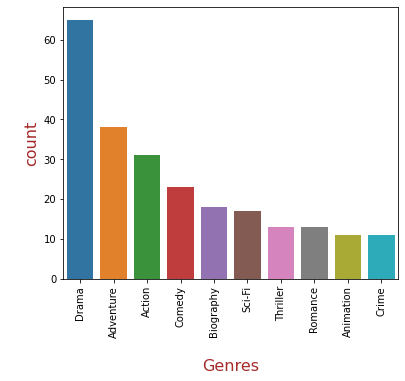

In [66]:
# Countplot for genres
plt.figure(figsize=[6,5])
sns.barplot(data=genre_top10,x='genres',y='cnt')
plt.xticks(rotation=90)
plt.xlabel('\nGenres',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\ncount',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

In [67]:
## So as we plotted the bar graph we saw that the bar of drama is the tallest meaning it has the occoured the most.

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

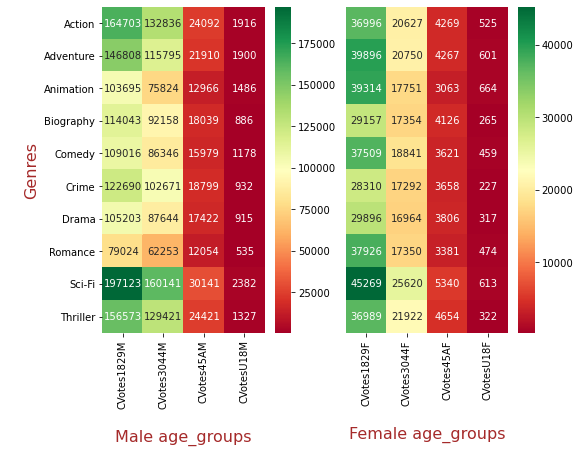

In [68]:
# 1st set of heat maps for CVotes-related columns

male=genre_top10.pivot_table(index='genres',values=['CVotesU18M','CVotes1829M','CVotes3044M','CVotes45AM'],aggfunc='mean')
female=genre_top10.pivot_table(index='genres',values=['CVotesU18F','CVotes1829F','CVotes3044F','CVotes45AF'],aggfunc='mean')

plt.figure(figsize=[8,6])

plt.subplot(1,2,1)
sns.heatmap(male,annot=True,fmt='g',cmap='RdYlGn')
plt.xlabel('\nMale age_groups',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nGenres',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

plt.subplot(1,2,2)
sns.heatmap(female,annot=True,fmt='g',cmap='RdYlGn')
plt.xlabel('\nFemale age_groups',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel(' ')
plt.yticks([])
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:

- Inference 1: Males have voted more than the females overall, however age group 18-29 has voted the most accross both the                    genders.


- Inference 2: The vote count for romance is the least among males accros all age groups.


- Inference 3: People under the age group of under 18 and above 45 have voted the least.


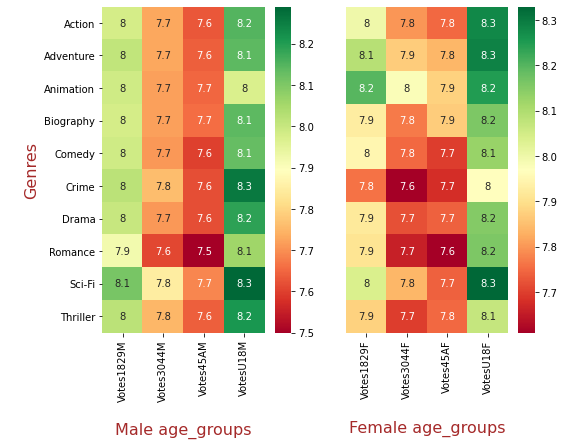

In [69]:
# 2nd set of heat maps for Votes-related columns
male1=genre_top10.pivot_table(index='genres',values=['VotesU18M','Votes1829M','Votes3044M','Votes45AM'],aggfunc='mean')
female1=genre_top10.pivot_table(index='genres',values=['VotesU18F','Votes1829F','Votes3044F','Votes45AF'],aggfunc='mean')

plt.figure(figsize=[8,6])

plt.subplot(1,2,1)
sns.heatmap(male1,annot=True,cmap='RdYlGn')
plt.xlabel('\nMale age_groups',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nGenres',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

plt.subplot(1,2,2)
sns.heatmap(female1,annot=True,cmap='RdYlGn')
plt.xlabel('\nFemale age_groups',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel(' ')
plt.yticks([])
plt.show()


**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:

- Inference 1: The under 18 age group has given higher ratings in general accross both the genders


- Inference 2: The age group 30 to 45 has given the lowest rating in general accross both the genders.


- Inference 3: Romance has been  given low rating comparatively in both the genders accross all age groups except for the under                18 age group for both genders, seems under 18 kids like romance. 

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [70]:
# Creating IFUS column

movies['IFUS']=movies['Country'].apply(lambda x: 'USA' if x=='USA' else 'non-USA')


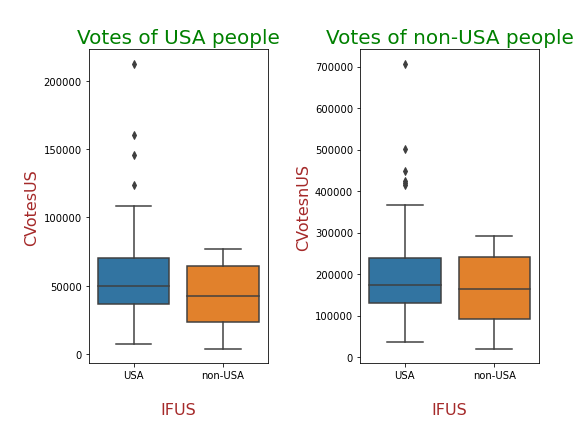

In [71]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
sns.boxplot(data=movies,x='IFUS',y='CVotesUS')
plt.xlabel('\nIFUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nCVotesUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.title('\nVotes of USA people',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})

plt.subplot(1,2,2)
sns.boxplot(data=movies,x='IFUS',y='CVotesnUS')
plt.xlabel('\nIFUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nCVotesnUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.title('\nVotes of non-USA people',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})

plt.tight_layout()
plt.show()


**`Inferences:`** Write your two inferences/observations below:

- Inference 1: Average number of votes is more for the non-USA people, i.e. non_USA people have voted more for both USA and                    non-USA movies. 


- Inference 2: The USA votes has outliers in both the USA and non-USA plots, however the USA movies have got the maximum votes                by both the USA and non-USA people.

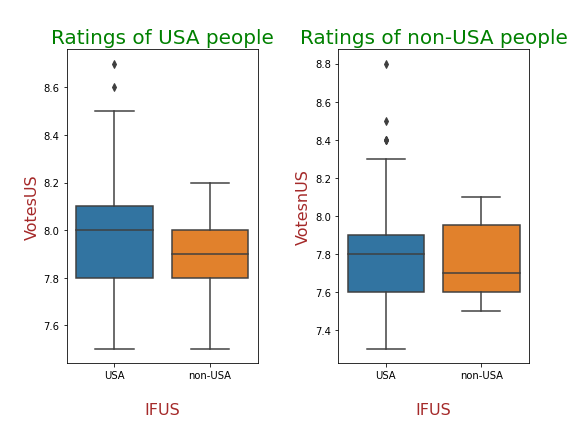

In [72]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
sns.boxplot(data=movies,x='IFUS',y='VotesUS')
plt.xlabel('\nIFUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nVotesUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.title('\nRatings of USA people',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})

plt.subplot(1,2,2)
sns.boxplot(data=movies,x='IFUS',y='VotesnUS')
plt.xlabel('\nIFUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nVotesnUS',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.title('\nRatings of non-USA people',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})

plt.tight_layout()
plt.show()


**`Inferences:`** Write your two inferences/observations below:

- Inference 1: The USA people have given higher ratings comparatively for both the USA and non-USA movies.


- Inference 2: The non_USA movies ratings are having equal distribution of raings by the USA people, i.e. the higher an lower                  end are at comparatively equal distance from the median than all the other ratings. 

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [73]:
# Sorting by CVotes1000
genre_top10.sort_values('CVotes1000', ascending=False, inplace=True)


In [74]:
genre_top10.head()


,genres,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
5,Sci-Fi,136781,148873,176646,106005,39518,14951,6583,3876,2715,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
2,Action,102144,114433,150895,94262,34688,12693,5386,3064,2115,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
6,Thriller,83207,112730,153336,90446,32003,11534,5021,2918,1982,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
1,Adventure,94596,105636,138482,86367,31896,11551,4817,2718,1835,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
9,Crime,52229,87919,129045,74671,25308,8971,3842,2246,1544,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


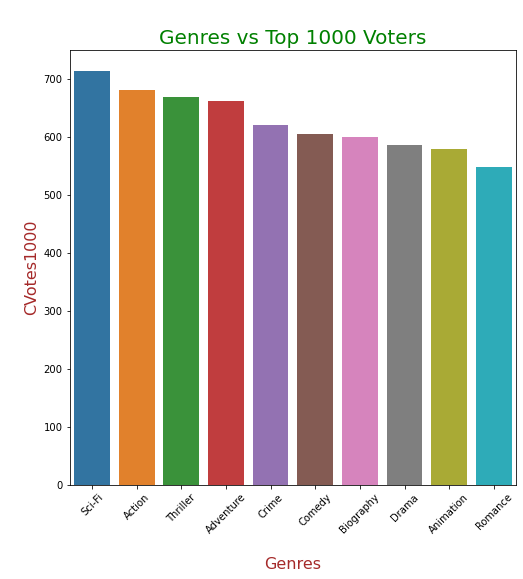

In [75]:
# Bar plot
plt.figure(figsize=[8,8])
sns.barplot(data=genre_top10,x='genres',y='CVotes1000')
plt.xticks(rotation=45)
plt.title('\nGenres vs Top 1000 Voters',fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel('\nGenres',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel('\nCVotes1000',fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.show()


**`Inferences:`** Write your inferences/observations here.

-  we see that Sci-Fi has got the max votes and Romance has got the least votes.


-  Talking about occourance, even though the Sci-Fi has occoured less as we saw in the previos bar chart we had plotted, it has    got max votes and we saw Drama had occoured most but it has been given lesser votes comparatively.


-  We can also see that number of votes for the Action,Thriller and Adventure genre are heving very less difference. i.e. they    are almost having similar number of votes, meaning they are liked alot as a combo.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.